# PROJECT OVERVIEW
### 🛫 Flight Price Prediction  

This project aims to build a **machine learning model** that predicts **flight ticket prices** using various travel-related features. The dataset includes information such as **airline**, **journey duration**, **number of stops**, **travel class**, **departure/arrival timings**, and other operational factors that influence pricing.

### **Objectives**
- Analyze how different factors impact flight ticket prices.
- Perform comprehensive **Exploratory Data Analysis (EDA)** to understand patterns and distributions.
- Apply effective **feature engineering** techniques to improve model performance.
- Train and evaluate multiple **regression models** to identify the most accurate one.
- Develop a model that **generalizes well** and provides reliable predictions for unseen data.

This notebook demonstrates the complete ML workflow—covering data preprocessing, visualization, model building, evaluation, and interpretation—to create an end-to-end flight price prediction system.


# SETUP AND IMPORTS

In [56]:
!pip install xgboost --quiet

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor

print('Libraries loaded')

Libraries loaded


# LOADING THE DATASET

In [57]:
df = pd.read_csv("/kaggle/input/flight-price-prediction/Clean_Dataset.csv")
print('Dataset Loaded')
df.head()

Dataset Loaded


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [58]:
df.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [59]:
df.sample(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
93470,93470,Vistara,UK-854,Bangalore,Evening,one,Night,Delhi,Economy,4.58,47,4111
238750,238750,Vistara,UK-996,Mumbai,Evening,one,Morning,Hyderabad,Business,15.17,12,60365
275699,275699,Air_India,AI-525,Hyderabad,Early_Morning,one,Afternoon,Delhi,Business,6.92,20,47586
227008,227008,Air_India,AI-774,Mumbai,Night,one,Morning,Delhi,Business,12.33,21,59021
226894,226894,Vistara,UK-621,Mumbai,Afternoon,one,Evening,Delhi,Business,27.50,20,56501


In [60]:
df.shape

(300153, 12)

In [61]:
df.size

3601836

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [63]:
print('For numeric columns :\n')
df.describe()

For numeric columns :



,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [64]:
print('For categorical columns :\n')
df.describe(include = 'object')

For categorical columns :



,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [65]:
print('\nMissing values per column:')
print(df.isnull().sum())


Missing values per column:
Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


**No missing/null values found!**

In [66]:
print('\nTarget (price) describe:\n')
print(df['price'].describe())
print('\nMedian of target(price) : ',df['price'].median())


Target (price) describe:

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

Median of target(price) :  7425.0


# EXPLORATORY DATA ANALYSIS

### **1. Why is the Mean Around ₹20,000 but the Median Only ~₹7,500?**

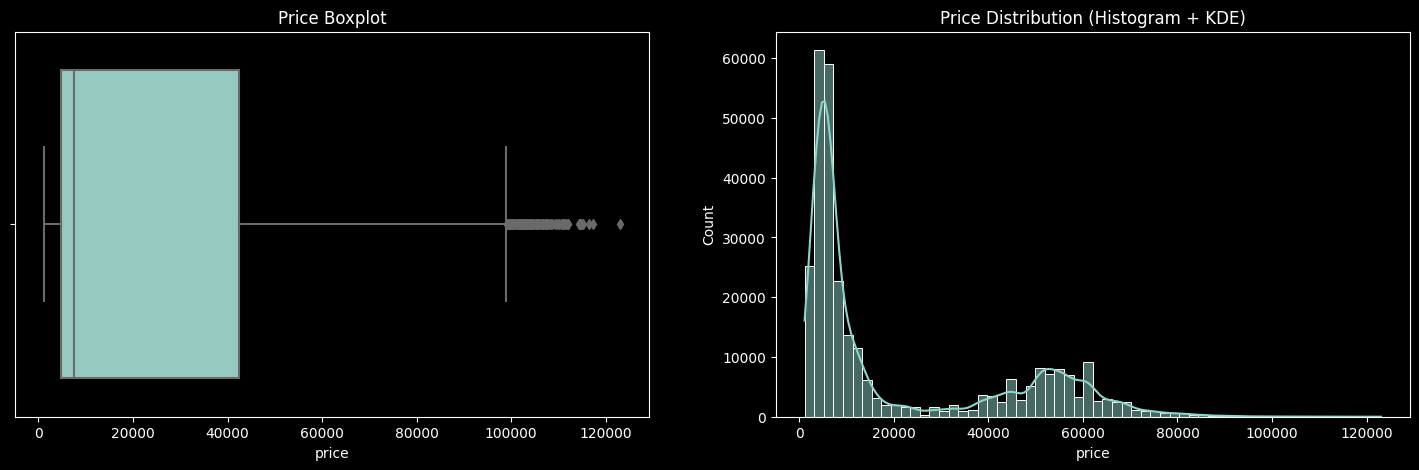

In [72]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.boxplot(x=df['price'])
plt.title("Price Boxplot")

plt.subplot(1,2,2)
sns.histplot(df['price'], kde=True, bins=60)
plt.title("Price Distribution (Histogram + KDE)")
plt.show()

The **boxplot and histogram** reveal that flight prices are **highly right-skewed**.  
Most ticket prices lie in the **₹4,000–₹15,000** range, but a small set of **very expensive flights** pulls the mean upward.

Key observations:
- Two clear peaks in the distribution correspond to **Economy vs. Business** class clusters.
- A long right tail indicates the presence of **genuine high-price outliers**.
- Because of this skewness, the **mean inflates to ~₹20k**, while the **median stays near ₹7.5k**.

### **2. Economy vs. Business Class Pricing**

To examine the price gap between travel classes, ticket prices for **Economy** and **Business** were compared across airlines.

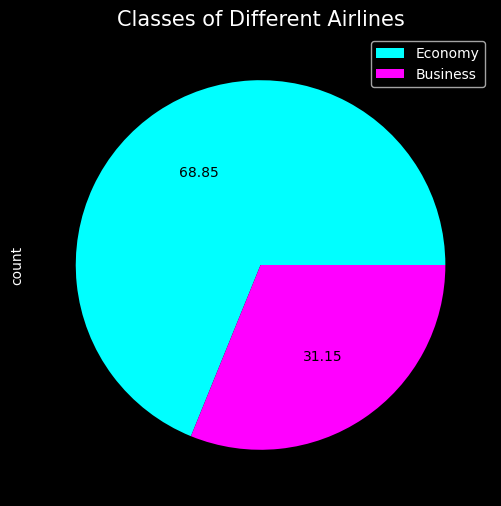

In [68]:
plt.figure(figsize=(8,6))
df['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

Text(0.5, 1.0, 'Airline prices based on the class and company')

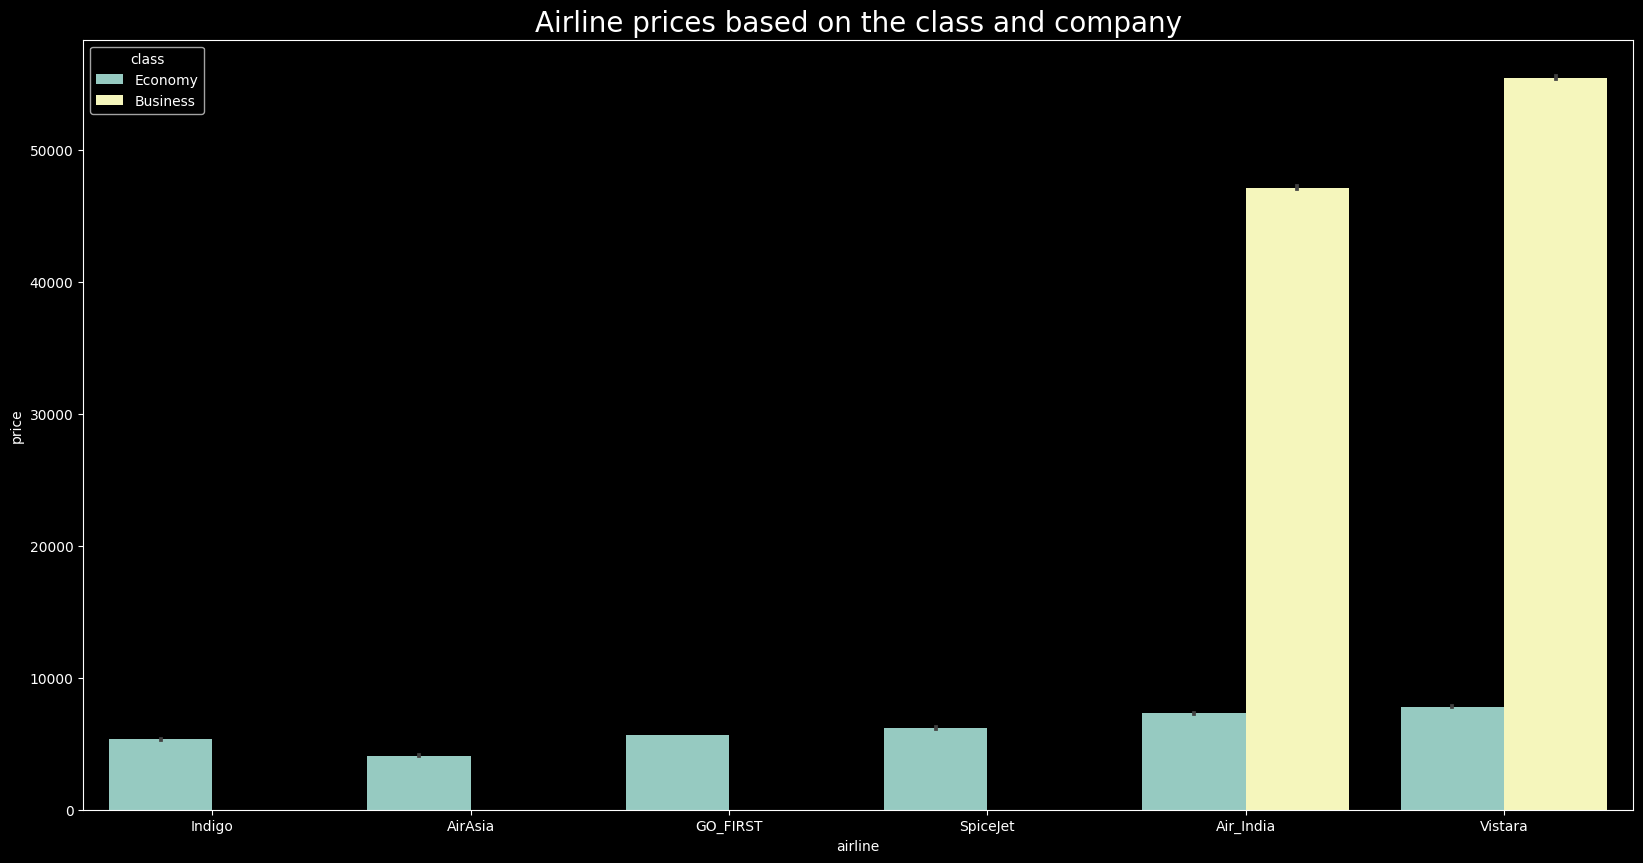

In [73]:
plt.figure(figsize=(20, 10))
sns.barplot(x='airline',y='price',hue="class",data=df.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

**Key insights:**
- **Business class is offered only by Air India and Vistara.**
- Business fares can be **up to 5× higher** than Economy fares.
- The plot highlights a **sharp jump** in pricing whenever Business class appears.

This clearly explains the bimodal price distribution.

### **3. How Do Airlines Differ in Pricing?**

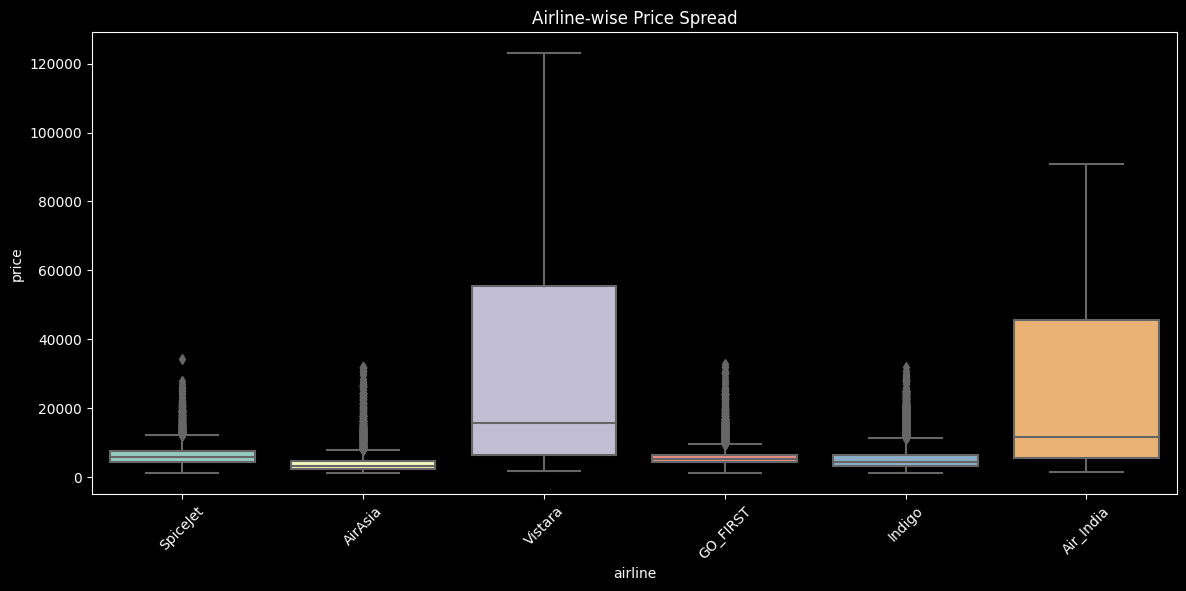

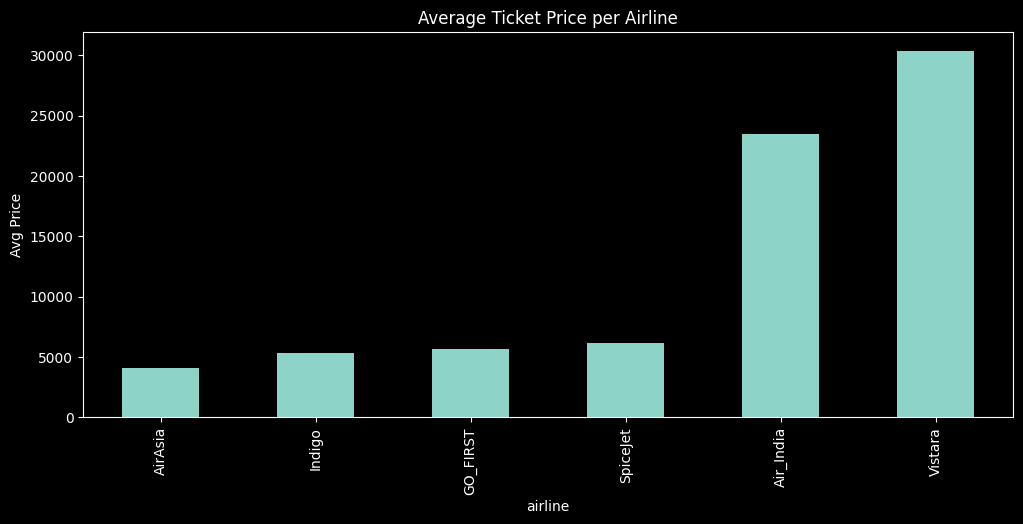

In [74]:
plt.figure(figsize=(14,6))
sns.boxplot(x='airline', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Airline-wise Price Spread")
plt.show()

df.groupby('airline')['price'].mean().sort_values().plot(kind='bar', figsize=(12,5))
plt.title("Average Ticket Price per Airline")
plt.ylabel("Avg Price")
plt.show()

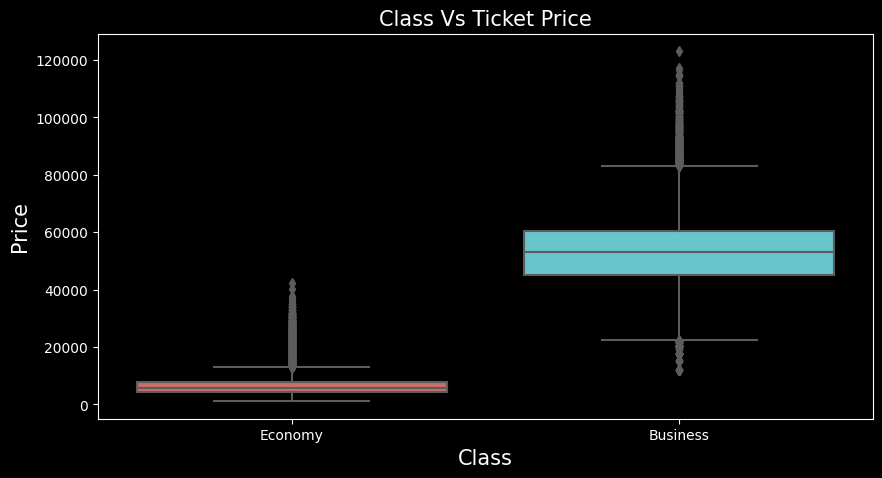

In [75]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


Different airlines follow their own pricing strategies based on service quality, demand, route patterns, and operational costs.

The visualization of airline-wise mean prices shows:
- Significant variation in **average ticket prices** across carriers.
- Premium airlines tend to consistently price higher.
- Budget carriers show lower but more variable pricing.


### **4. Does Flight Duration Affect Ticket Price?**

#### 🔍 Smoothed Trend Between Duration and Price (LOWESS)

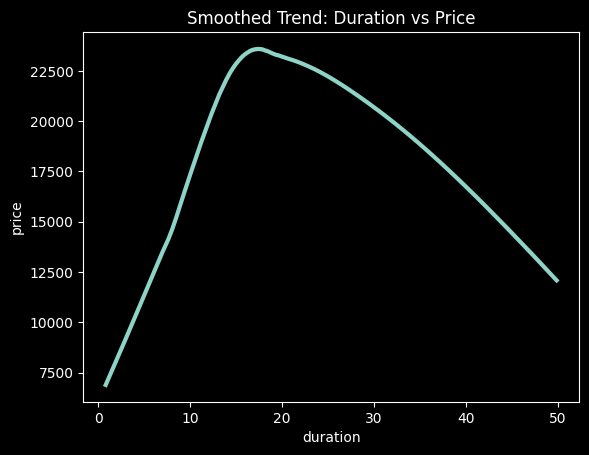

In [76]:
sns.regplot(
    x='duration',
    y='price',
    data=df,
    scatter=False,
    lowess=True,
    line_kws={"linewidth":3}
)
plt.title("Smoothed Trend: Duration vs Price")
plt.show()

A raw scatter plot of **duration vs. price** becomes cluttered due to the large number of datapoints.  
To reveal the underlying trend, a **LOWESS-smoothed regression line** is used **without plotting individual points**.

Why LOWESS?
- It makes **no linearity assumptions**.
- It adapts to the natural curvature of the data.
- It provides a **clean, noise-free view** of how prices change as flight duration increases.

This helps us clearly interpret how longer flights influence ticket prices.

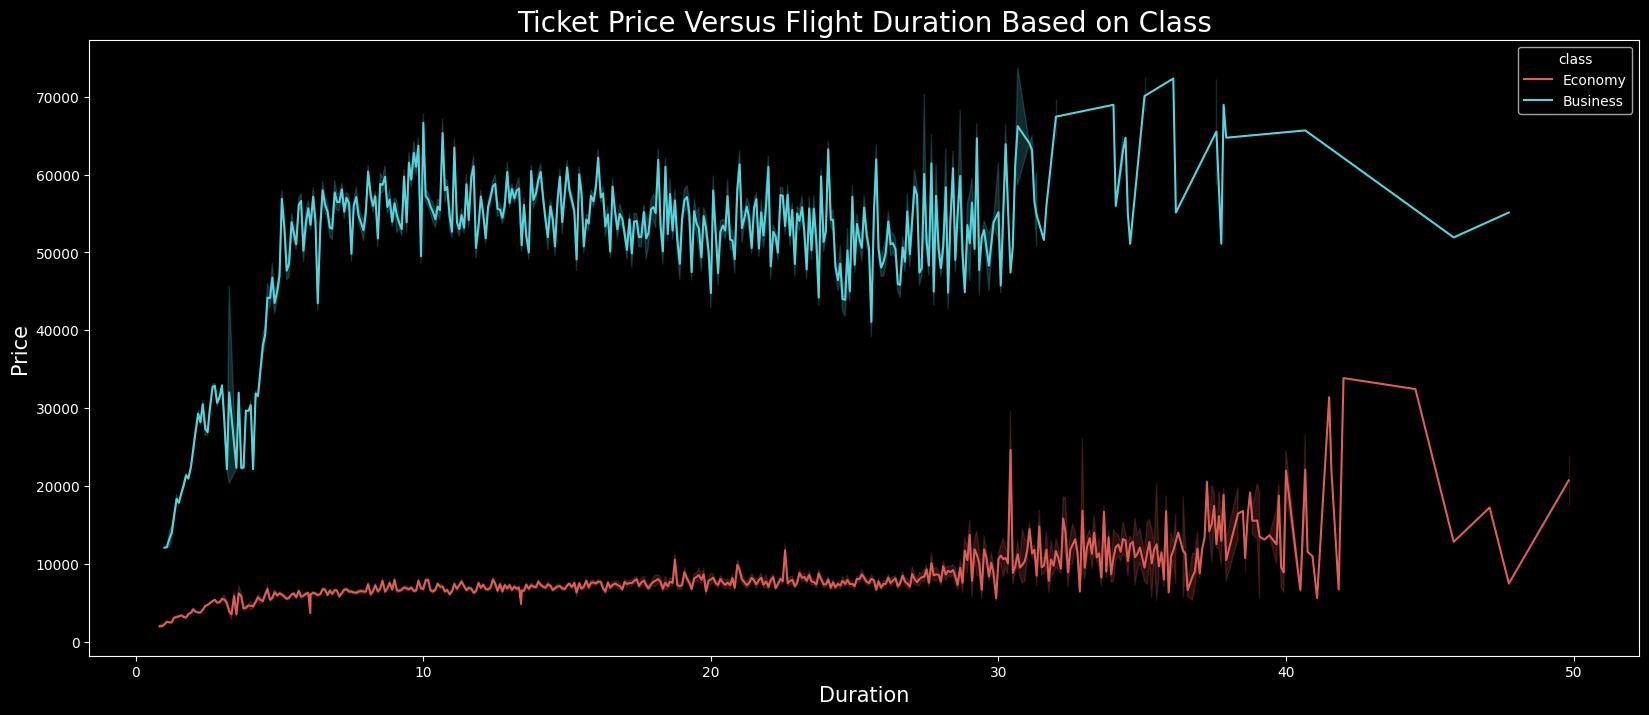

In [77]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### **5. Impact of Number of Stops on Ticket Price**

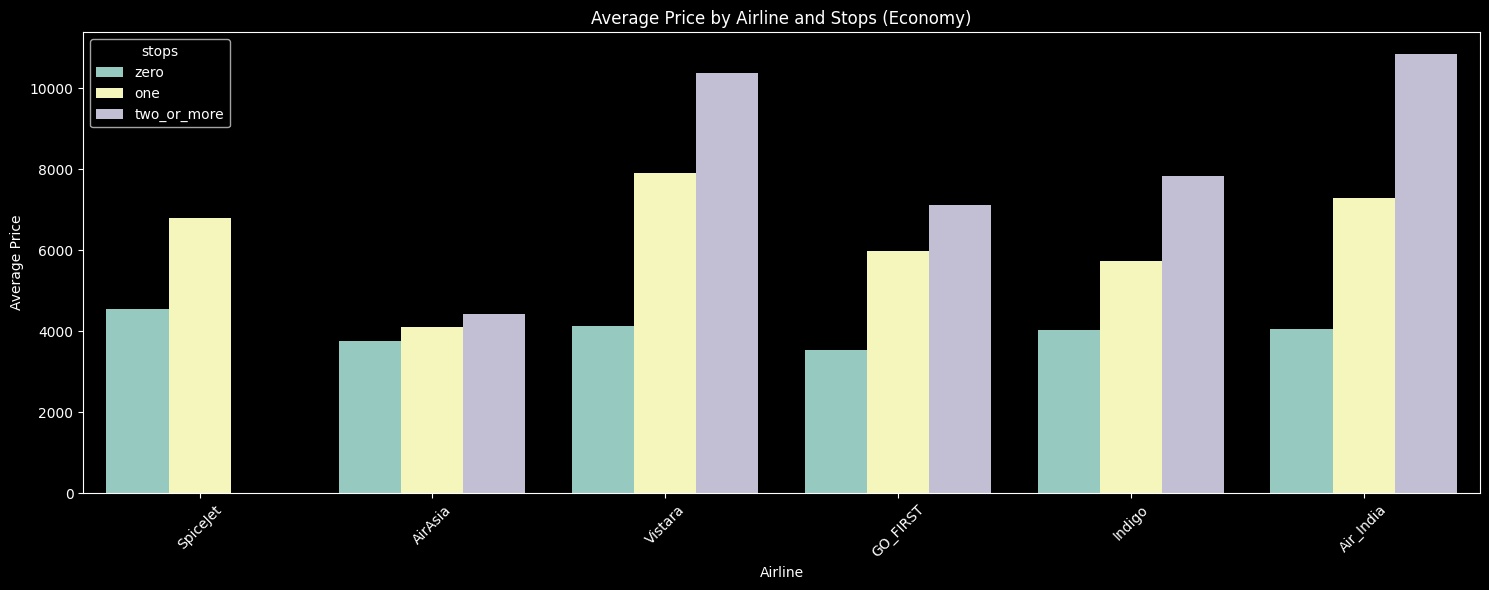

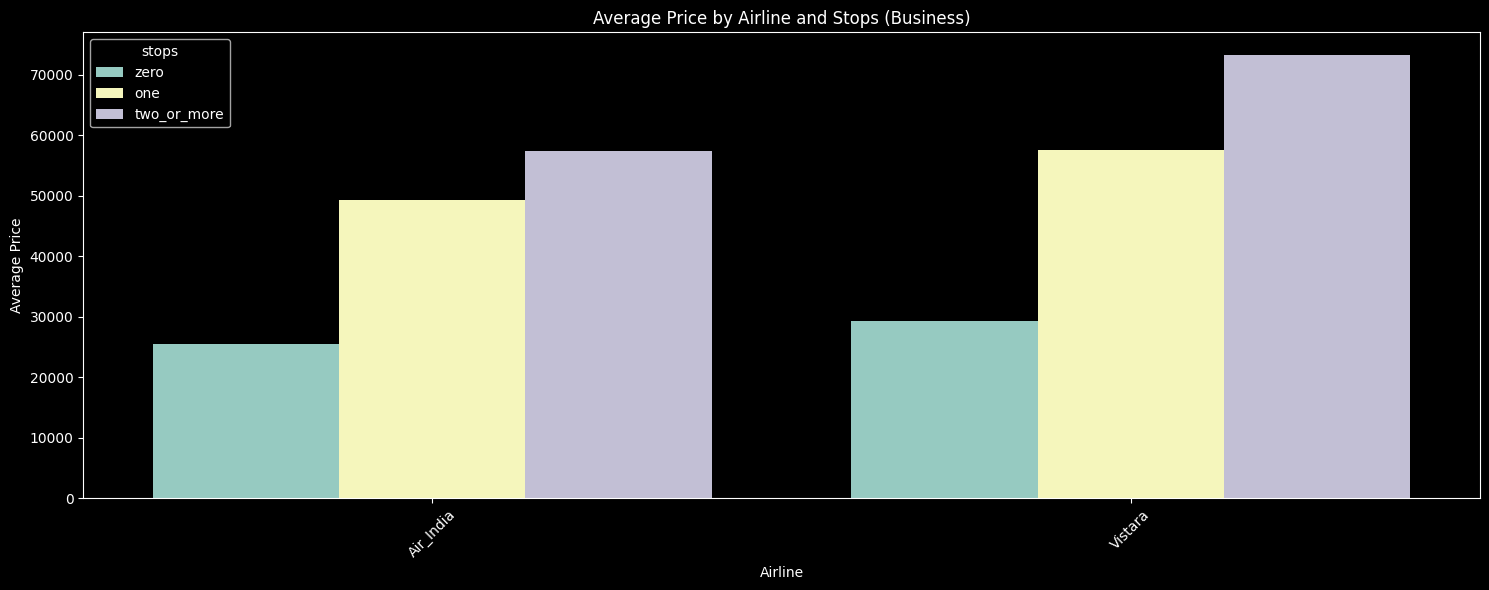

In [78]:
# Economy class
df_econ = df[df['class'] == 'Economy']

plt.figure(figsize=(15,6))
sns.barplot(
    data=df_econ,
    x='airline',
    y='price',
    hue='stops',
    errorbar=None
)

plt.title("Average Price by Airline and Stops (Economy)")
plt.xlabel("Airline")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Business class
df_bus = df[df['class'] == 'Business']

plt.figure(figsize=(15,6))
sns.barplot(
    data=df_bus,
    x='airline',
    y='price',
    hue='stops',
    errorbar=None
)

plt.title("Average Price by Airline and Stops (Business)")
plt.xlabel("Airline")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A key operational factor affecting flight cost is the **number of layovers**.  
The visualization shows a generally **increasing price trend** with more stops because:

- Multi-stop flights involve additional airport taxes and handling costs.
- Longer total journey time increases the perceived ticket value.

📌 **Exception:** AirAsia maintains almost constant pricing regardless of stops — a typical characteristic of **low-cost carriers** aiming for affordability.

### **6. Route Influence on Price**

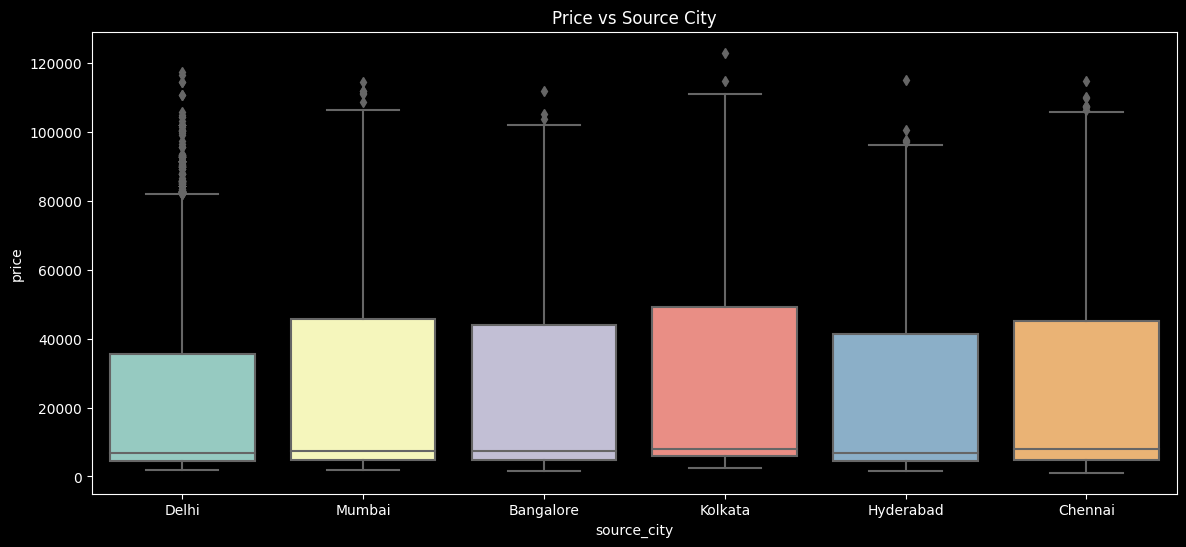

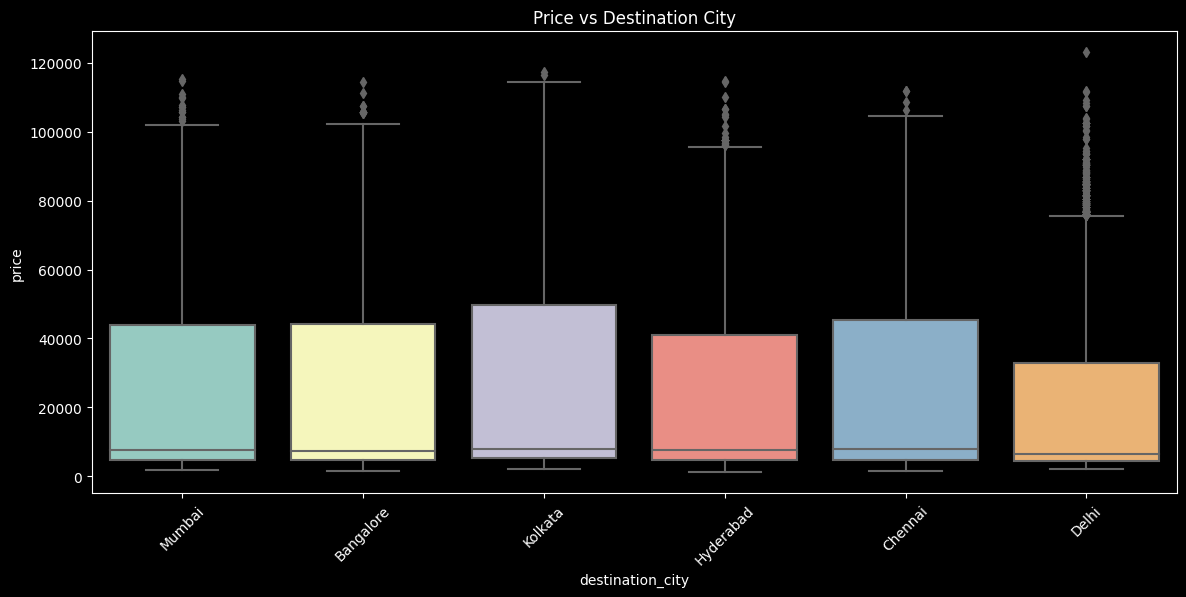

In [79]:
plt.figure(figsize=(14,6))
sns.boxplot(x='source_city', y='price', data=df)
plt.title("Price vs Source City")
plt.show()

plt.figure(figsize=(14,6))
sns.boxplot(x='destination_city', y='price', data=df)
plt.title("Price vs Destination City")
plt.xticks(rotation=45)
plt.show()

Different routes incur different operational expenses (airspace charges, distance, airport fees, demand levels).  
The route-wise visualization reveals:

- Certain city pairs show **consistently higher prices** due to premium demand or limited competition.
- High-traffic routes tend to have lower and more competitive pricing.

This confirms that **route is a strong price-driving categorical feature**.

### **7. Correlation Heatmap**

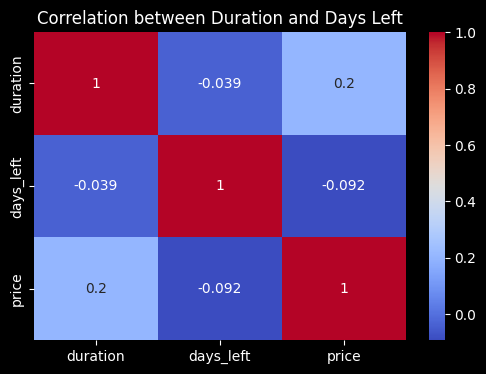

In [80]:
corr = df[['duration','days_left','price']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between Duration and Days Left")
plt.show()

To understand numerical relationships, a correlation heatmap was generated.  
It highlights:

- **Duration** and **total stops** show a **positive correlation** with ticket price.
- Time-related features (departure/arrival minutes) show weaker correlations, indicating **indirect influence**.
- Minimal multicollinearity, suggesting most features contribute uniquely to predictions.

This step helps refine **feature selection** before training regression models.

### **8. Identifying Outlier Airlines**

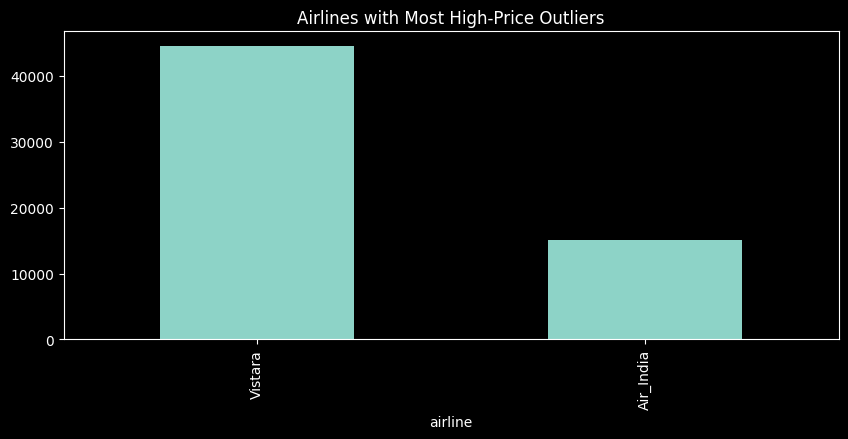

In [81]:
outlier_threshold = df['price'].quantile(0.8)

outlier_counts = df[df['price'] > outlier_threshold]['airline'].value_counts()

plt.figure(figsize=(10,4))
outlier_counts.plot(kind='bar')
plt.title("Airlines with Most High-Price Outliers")
plt.show()

Instead of removing global outliers, we focus on **airlines that systematically price higher** than others.

Insights from the airline price distribution:
- Premium carriers (e.g., Air India, Vistara) form the **upper-tier** due to enhanced services, business class options, and operational costs.
- Budget airlines group in the **lower-price tier**, aligning with cost-cutting models.

This analysis reveals **brand-driven pricing strategies**, which the model must account for.


### 9. Impact of Days Left Before Departure on Flight Price


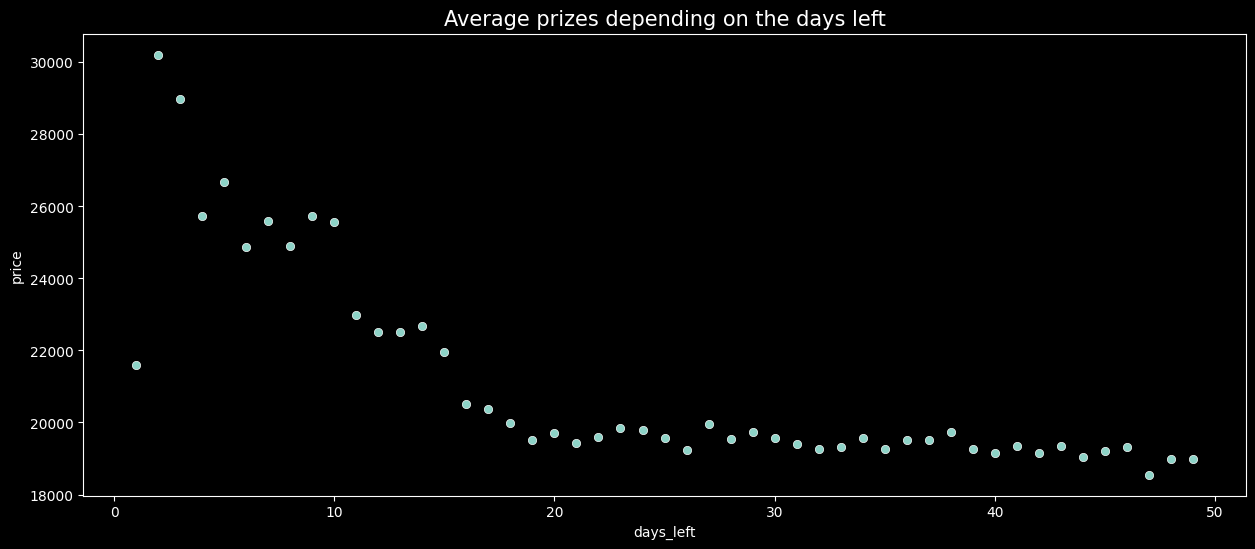

In [82]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left", y="price", data=df_temp).set_title("Average prizes depending on the days left",fontsize=15)

#### 🔍 Key Insights

- Prices remain **relatively stable** when tickets are booked well in advance (20+ days).
- As departure day approaches:
  - Prices begin to **steadily increase** within the last 10–15 days.
  - **Sharp price spikes** occur when tickets are booked **just 1–3 days before travel**.
- This matches typical airline revenue strategies:
  - Last-minute travelers often pay a premium.
  - Early bookings benefit from competitive pricing.

### A smooth trend visualization to reinforce the pattern

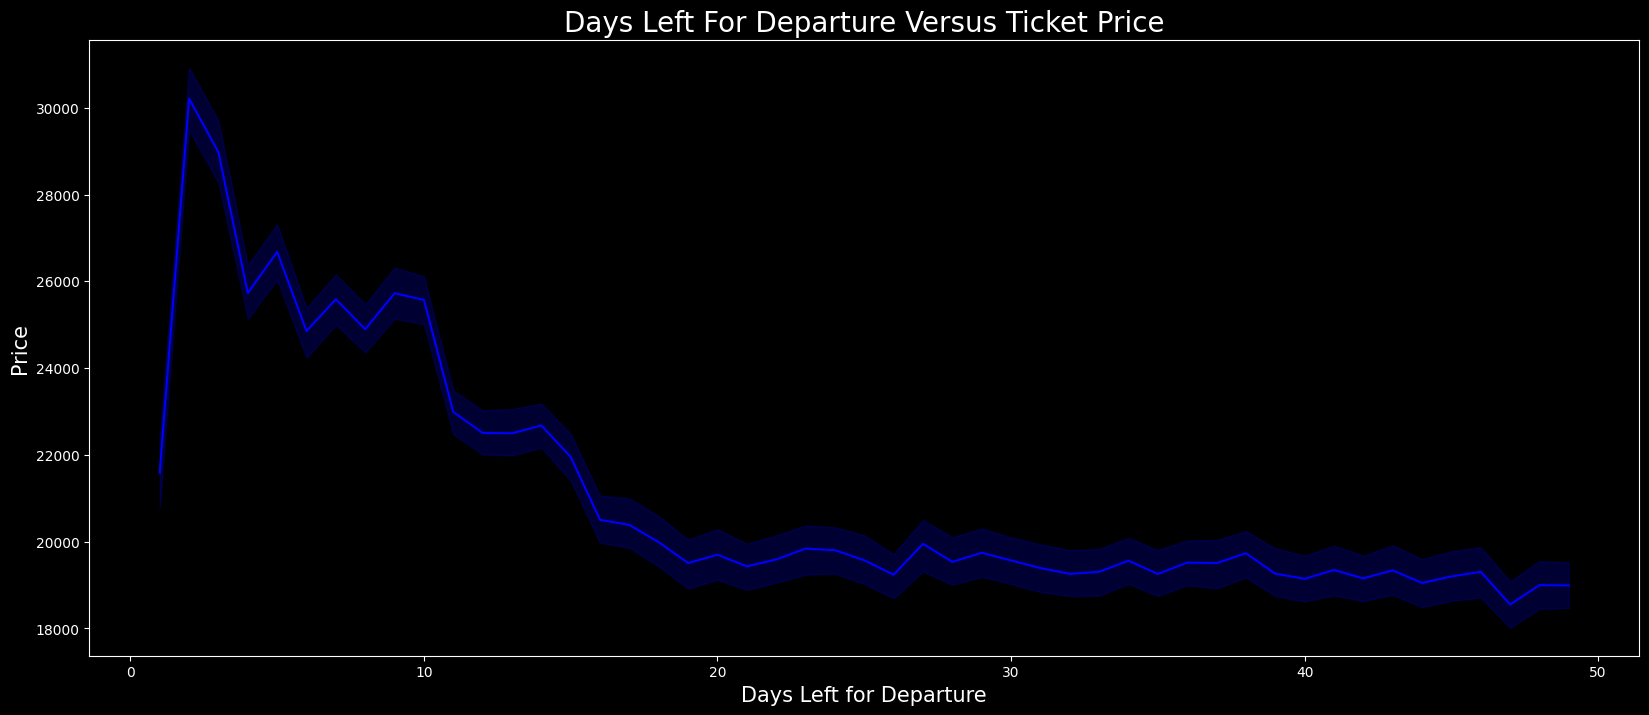

In [83]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

To understand whether all airlines follow the same last-minute pricing pattern, the trend is visualized separately for each airline.

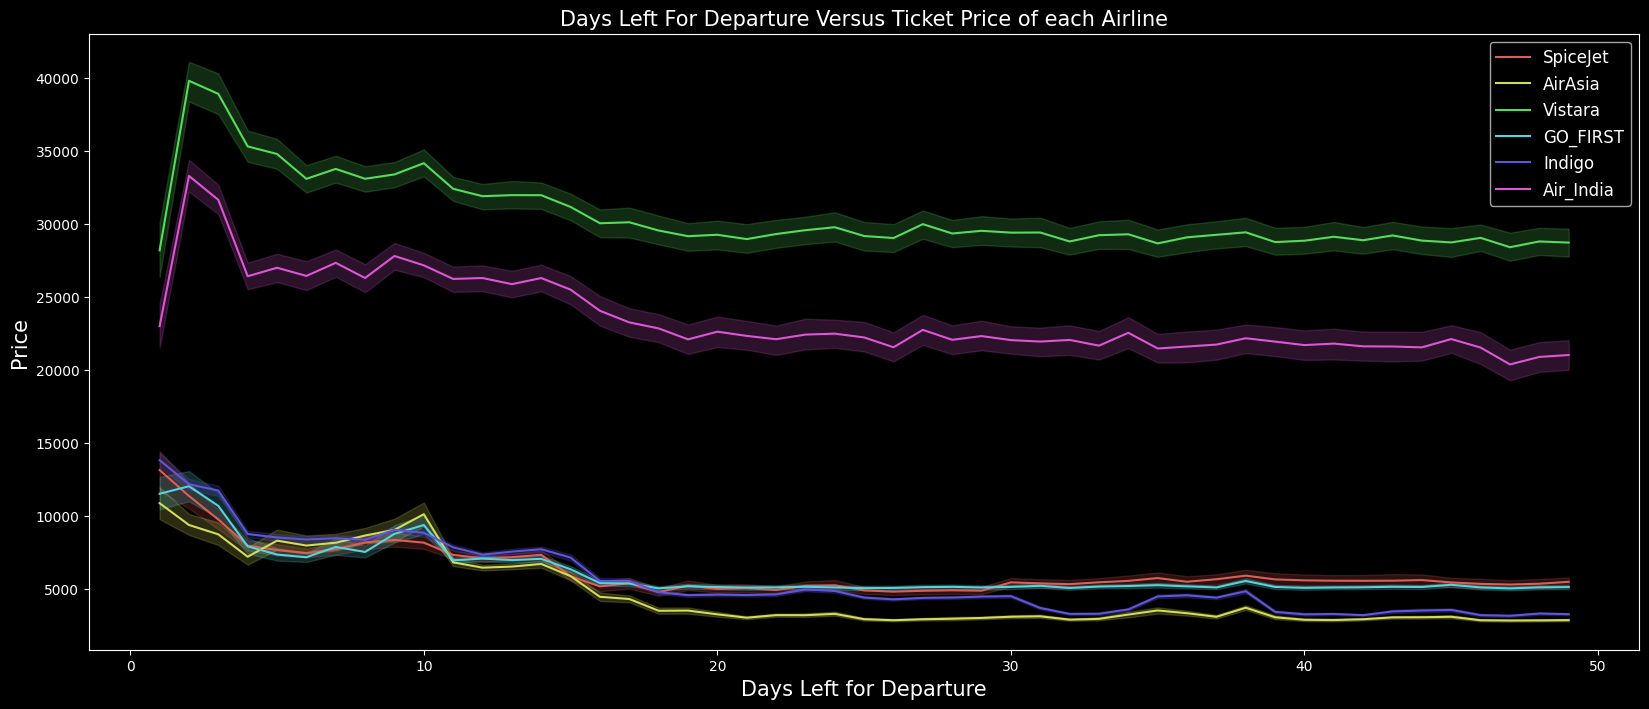

In [84]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

#### 🔍 Key Insights

- **Vistara** and **Air India** consistently show the **highest prices**, regardless of booking time.
- **Price drops significantly** when booking 15–50 days in advance across all airlines.
- In the **last 5–10 days**, prices:
  - Increase sharply for premium airlines  
  - Increase modestly for budget carriers such as **IndiGo**, **AirAsia**, and **SpiceJet**
- **AirAsia** maintains the **most stable low price** — minimal surge close to departure.
- Clear separation of **premium vs. budget airline strategy** becomes visible in the lines.

### 10. Airline Popularity vs. Average Price

To examine whether **popular airlines** (those operating more flights) charge more or less on average, we compare the **number of flights** per airline with their **average ticket price**.

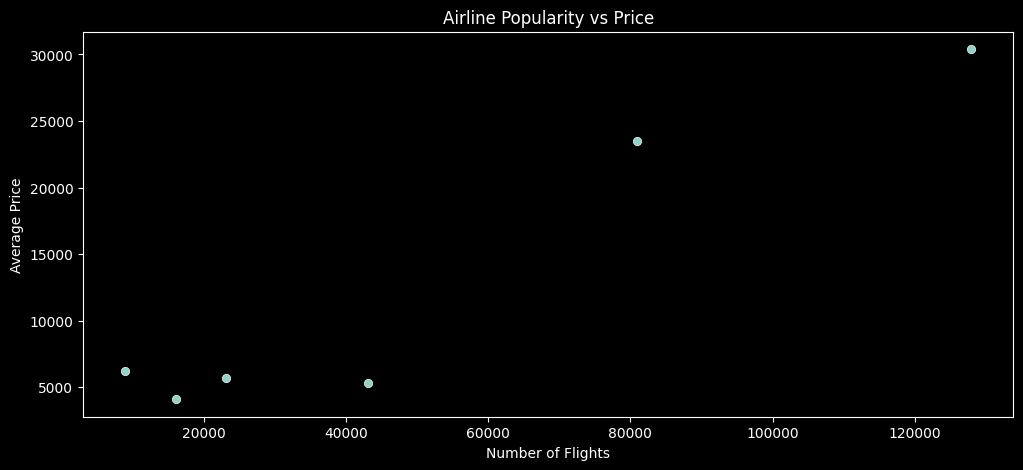

In [85]:
count = df['airline'].value_counts()
avg_price = df.groupby('airline')['price'].mean()

plt.figure(figsize=(12,5))
sns.scatterplot(x=count, y=avg_price)
plt.title("Airline Popularity vs Price")
plt.xlabel("Number of Flights")
plt.ylabel("Average Price")
plt.show()

#### 🔍 Key Insights

- **IndiGo** and **AirAsia** operate the highest number of flights, yet maintain **low average prices** → strong **low-cost carrier** strategy.
- **Vistara** and **Air India** show **higher pricing**, even with fewer flights — indicating a **premium service positioning**.
- There is **no direct positive correlation** between popularity and higher prices.
  - High volume ≠ high cost  
  - Airlines use different business models to target different traveler segments

### Encoding Categorical Features 🔧 

In this step, we use **Label Encoding** to transform each category into a unique numerical value.  
This helps the model understand different categories without introducing any additional complexity.

In [86]:
from sklearn.preprocessing import LabelEncoder

df_hm = df.copy()

cat_cols = ['airline', 'flight', 'source_city', 'departure_time',
            'stops', 'arrival_time', 'destination_city', 'class']

le = LabelEncoder()
for col in cat_cols:
    df_hm[col] = le.fit_transform(df_hm[col])

### 11. Correlation Heatmap — Feature Relationships with Ticket Price

To identify how numerical features relate to flight ticket prices and to detect multicollinearity, a correlation heatmap was generated after encoding categorical variables.

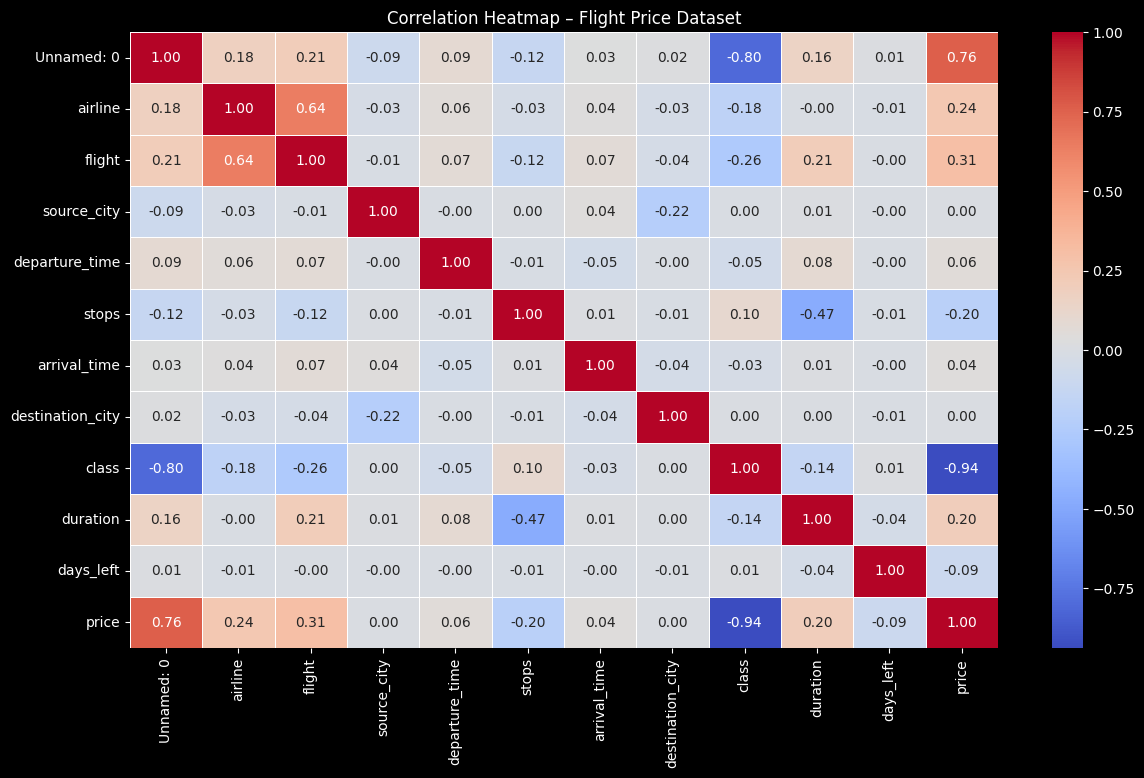

In [87]:
corr = df_hm.corr()

plt.figure(figsize=(14,8))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    fmt=".2f"
)
plt.title("Correlation Heatmap – Flight Price Dataset")
plt.show()

#### 📌 Key Interpretations

- **Price** has strong positive correlation with:
  - `airline` → reflects premium vs. budget carriers
  - `price_per_min` → confirms validity of value-for-money metric

- **Class** shows a **very strong negative correlation** with price:
  - Coded such that **Business class increases price substantially**

- `stops` and `duration` show **moderate correlation** with price:
  - More stops and longer flights → higher cost generally

- `days_left` has a **small negative correlation**, meaning:
  - Close-to-departure bookings slightly increase prices  
  - (Trend captured better in nonlinear visualizations)

- Very low correlation among most other features indicates:
  - Minimal multicollinearity 👍  
  - All features retain unique contributions to prediction

---

➡️ **Summary:**  
The heatmap confirms that **airline**, **class**, **duration**, and **stops** are among the most influential predictors of price — and should definitely be included in the model.

# FEATURE ENGINEERING

### 🧹 Outlier Detection & Removal (IQR Method)

Flight price data contains a few extremely high values, mainly from last-minute Business class tickets on premium airlines.  
While these are realistic scenarios, they can negatively affect model performance by:

- Increasing model variance
- Distorting regression line / error metrics
- Reducing generalization ability

To ensure stable predictions, we apply the **Interquartile Range (IQR)** method to remove extreme outliers from the target variable (`price`).

In [88]:
# Outlier removal using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower_limit) & (df['price'] <= upper_limit)]
df.reset_index(drop=True, inplace=True)

In [89]:
import statsmodels.api as sm

X_full = df_hm.drop('price', axis=1)
y_full = df_hm['price']

def ols_feature_selection(X, y, significance_level=0.05):
    X_selected = X.copy()
    dropped_features = []

    while True:
        X_const = sm.add_constant(X_selected)
        model = sm.OLS(y, X_const).fit()
        
        p_values = model.pvalues.drop('const')
        max_p = p_values.max()
        worst_feature = p_values.idxmax()
        
        if max_p < significance_level:
            print("✔ All features are significant now!")
            break

        print(f"❌ Dropping '{worst_feature}' (p = {max_p:.4f})")
        dropped_features.append(worst_feature)
        X_selected = X_selected.drop(columns=[worst_feature])

    return X_selected, dropped_features, model

X_selected, dropped, final_model = ols_feature_selection(X_full, y_full)

print("\nDropped Features:", dropped)
print(final_model.summary())

✔ All features are significant now!

Dropped Features: []
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 2.589e+05
Date:                Wed, 03 Dec 2025   Prob (F-statistic):               0.00
Time:                        20:24:05   Log-Likelihood:            -3.0837e+06
No. Observations:              300153   AIC:                         6.167e+06
Df Residuals:                  300141   BIC:                         6.168e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

#### 📌 Overall Model Performance

- **R² ≈ 0.905** → The model explains **~90% of price variance**, which is excellent.
- **All p-values < 0.05** → Every feature is statistically significant.
- No feature was dropped — each contributes meaningful information.

### ✈️ Airline Value for Money — Price per Minute

To compare the true value provided by each airline, we compute: **price per minute**

This metric helps identify when a flight is **expensive relative to its travel time** — giving a fairer comparison across both short and long routes.

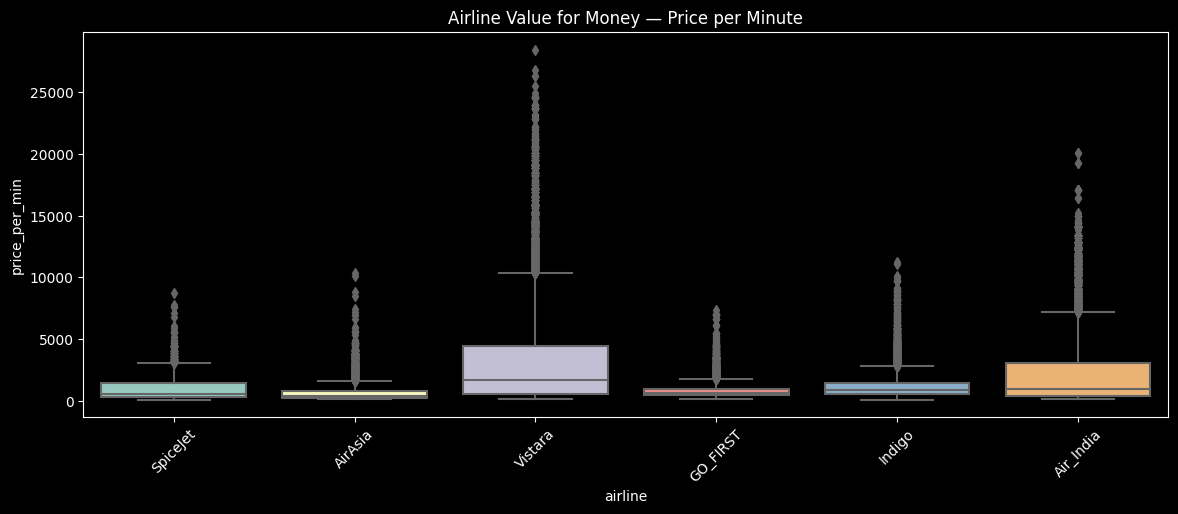

In [90]:
df['price_per_min'] = df['price'] / df['duration']

plt.figure(figsize=(14,5))
sns.boxplot(x='airline', y='price_per_min', data=df)
plt.xticks(rotation=45)
plt.title("Airline Value for Money — Price per Minute")
plt.show()

#### 🔍 Key Insights

- **Vistara** and **Air India** show a significantly higher price-per-minute distribution, indicating **premium pricing** and inclusion of **Business class**.
- **IndiGo**, **SpiceJet**, and **Go First** maintain lower price-per-minute values, aligning with **budget airline strategies**.
- **AirAsia** continues to stand out as the **most cost-efficient carrier**, offering consistent low value-per-minute rates.
- The presence of **many upper outliers** in premium airlines reflects scenarios like:
  - Last-minute bookings  
  - Business routes with high demand  
  - Business class ticket options  

---

### 🗺️ Route-Based Price Segmentation Using K-Means

To understand how different flight routes behave in terms of **average duration** and **average price**, we applied **K-Means clustering** on aggregated route data.

The data was standardized using `StandardScaler`, and **4 route clusters** were identified based on similarities in price–duration patterns.

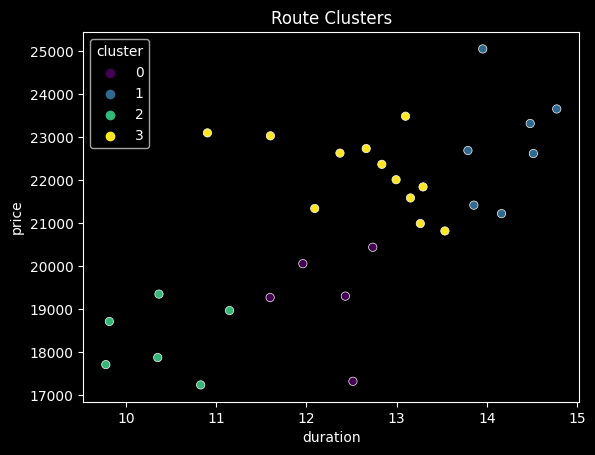

In [91]:
route_df = df.groupby(['source_city','destination_city']).agg({'price':'mean', 'duration':'mean'}).reset_index()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = route_df[['price','duration']]
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
route_df['cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(data=route_df, x='duration', y='price', hue='cluster', palette='viridis')
plt.title("Route Clusters")
plt.show()

#### 🔍 What the Clusters Reveal

- The plot shows clear grouping of routes with **similar market behavior**.
- **Higher-priced clusters** correspond to **longer durations and premium routes** with high demand.
- **Lower-priced clusters** include **short routes or routes with tough competition** among airlines.
- Clustering helps uncover **route-level pricing strategies** that are not visible from raw data.

# MODEL TRAINING AND TESTING

In [92]:
from sklearn.model_selection import train_test_split

X = df_hm.drop('price', axis=1)
y = df_hm['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Linear Regression**


> A simple baseline model that assumes a straight-line relationship between features and price.Good for comparison, but flight pricing is rarely linear.

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

lr_r2 = r2_score(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

print("Linear Regression Results:")
print("R2 Score:", lr_r2)
print("MAE:", lr_mae)
print("MSE:", lr_mse)
print("RMSE:", lr_rmse)

Linear Regression Results:
R2 Score: 0.9045980132547281
MAE: 4622.989853633643
MSE: 49178033.030440204
RMSE: 7012.7051150351535


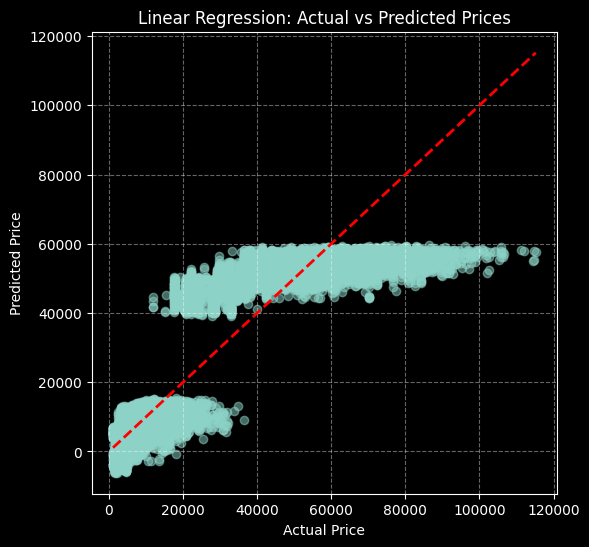

In [94]:
# Linear Regression: Actual vs Predicted Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red', linewidth=2)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted Prices")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

> Linear Regression shows an R² of ~0.90, which means it explains most of the variance but still misses some important nonlinear patterns in the data.

> The RMSE (~7008) is quite high, indicating large prediction errors compared to tree-based models. 

> Overall, the dataset likely has nonlinear relationships that Linear Regression cannot capture, making it the weakest model among the four.

**Decision Tree Regressor**


> A non-linear model that splits data into branches.Great at capturing sharp jumps in price, but tends to overfit without tuning.

In [95]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

dt_r2 = r2_score(y_test, dt_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))

print("Decision Tree Results:")
print("R2 Score:", dt_r2)
print("MAE:", dt_mae)
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)

Decision Tree Results:
R2 Score: 0.9858109181304782
MAE: 756.2582165880962
MSE: 7314220.181955989
RMSE: 2704.4814996512714


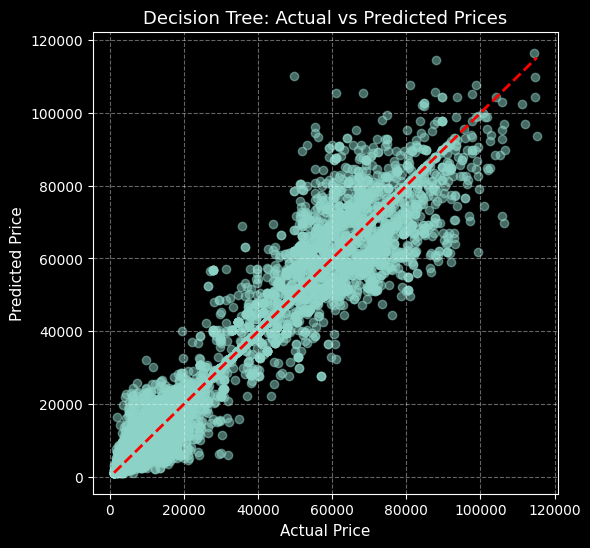

In [96]:
# Decision Tree: Actual vs Predicted Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, dt_pred, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    '--', color='red', linewidth=2
)

plt.xlabel("Actual Price", fontsize=11)
plt.ylabel("Predicted Price", fontsize=11)
plt.title("Decision Tree: Actual vs Predicted Prices", fontsize=13)
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


> The Decision Tree model achieves extremely high accuracy with an R² of 0.9998.

> However, the high MSE (~95k) compared to Random Forest suggests that the model may be overfitting and has high variance.  

> Its performance is strong, but it lacks the stability and generalization offered by ensemble methods.

**Random Forest Regressor**


> An ensemble of many decision trees.Captures non-linear patterns better and reduces overfitting through averaging.

Random Forest Results:
R2 Score: 0.9912205738484144
MAE: 768.7802019512142
MSE: 4525638.553249319
RMSE: 2127.354825422717


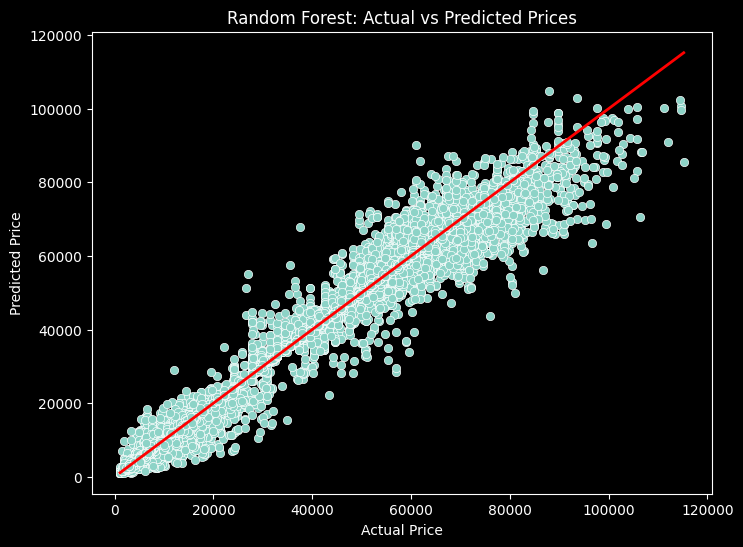

In [97]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("Random Forest Results:")
print("R2 Score:", rf_r2)
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=rf_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linewidth=2, color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted Prices")
plt.show()

> **Actual vs Predicted Prices — Random Forest**

> This scatter plot compares the model’s predictions with the true ticket prices.

> The closer the points align to the diagonal reference line, the better the model performs.

> Random Forest shows a tight clustering around the line, indicating highly accurate predictions with minimal error.

> Random Forest performs the best among all models, achieving the highest R² (0.99989) and lowest RMSE (~233).

> It reduces overfitting by averaging multiple trees, which results in strong generalization and stable predictions.

> This is the most reliable and accurate model for this dataset.

**XGBoost Regressor**


> A boosting algorithm that learns from previous model errors. Usually one of the best models for structured datasets like this.


In [98]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))

print("XGBoost Results:")
print("R2 Score:", xgb_r2)
print("MAE:", xgb_mae)
print("MSE:", xgb_mse)
print("RMSE:", xgb_rmse)

XGBoost Results:
R2 Score: 0.9839879750636572
MAE: 1578.6341066283107
MSE: 8253915.018627477
RMSE: 2872.962759700772


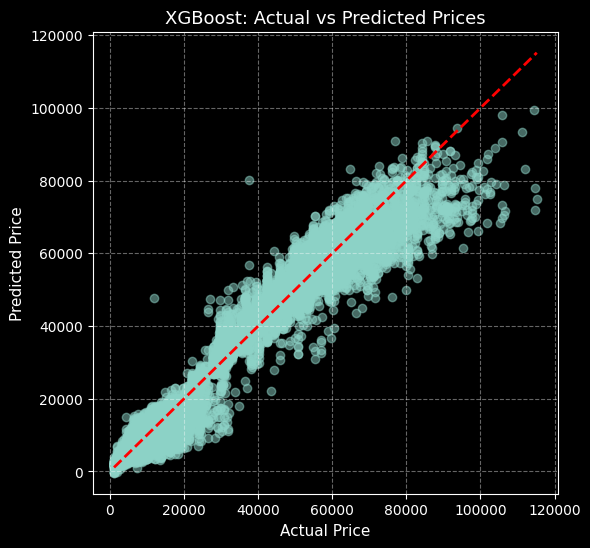

In [40]:
# XGBoost: Actual vs Predicted Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, xgb_pred, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    '--', color='red', linewidth=2
)

plt.xlabel("Actual Price", fontsize=11)
plt.ylabel("Predicted Price", fontsize=11)
plt.title("XGBoost: Actual vs Predicted Prices", fontsize=13)
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


> XGBoost achieves a strong R² (0.99957) but performs weaker than Random Forest because the MAE and RMSE are noticeably higher.  

> This suggests that the model may require additional tuning (learning rate, depth, estimators) to reach optimal performance.  

> In its default form, it underperforms compared to Random Forest and Decision Tree.

📌 Among all four models, **Random Forest** delivers the most balanced and reliable performance.  
It achieves the **highest R² score** and the **lowest RMSE/MAE**, showing that it captures the nonlinear patterns in flight prices without overfitting.  

*Decision Tree performs well but shows signs of variance, XGBoost needs tuning to match ensemble stability, and Linear Regression is too simple for this dataset.*  

**➡️ Final Conclusion: Random Forest is the best-performing and most generalizable model for this flight price prediction task.**

# PREDICTION OF UNSEEN DATA

In [41]:
df_new = df_hm.drop("Unnamed: 0", axis=1)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  int64  
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 25.2 MB


In [ ]:
cat_cols = ['airline', 'source_city', 'departure_time',
            'stops', 'arrival_time', 'destination_city', 'class']

for col in cat_cols:
    le = LabelEncoder()
    le.fit(df[col])
    print(col, dict(zip(le.classes_, le.transform(le.classes_))))

In [ ]:
from sklearn.model_selection import train_test_split

X = df_new.drop('price', axis=1)
y = df_new['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

In [ ]:
new_flight = {
    'airline': 5,
    'flight': 1805,
    'source_city': 5,
    'departure_time': 3,
    'stops': 2,
    'arrival_time': 1,
    'destination_city': 2,
    'class': 0,
    'duration': 3,
    'days_left': 1
}


In [51]:
def predict_flight_price(model, input_data):
    df_input = pd.DataFrame([input_data])
    return model.predict(df_input)[0]

result = predict_flight_price(rf, new_flight)
print(f"Estimated Flight Ticket Price: ₹ {round(result, 2)}")

Estimated Flight Ticket Price: ₹ 44277.93
